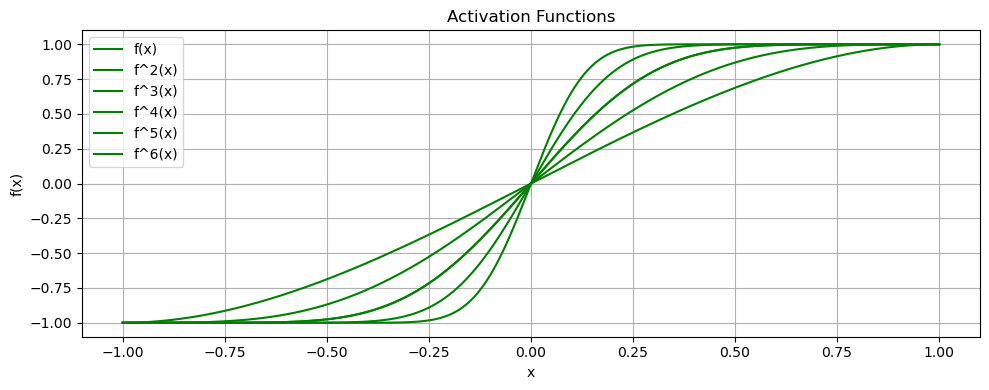

In [2]:

import matplotlib.pyplot  as plt
import math
import numpy as np

# aSOR
def f(x):
    # return x*(2 - x)
    return -0.5 * x**3 + 1.5 * x

     
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 4))

# Generate x values
x = np.linspace(-1, 1, 10000)
# Plot activation functions
ax1.plot(x, f(x), label='f(x)', color='green')
ax1.plot(x, f(f(x)), label='f^2(x)', color='green')
ax1.plot(x, f(f(f(x))), label='f^3(x)', color='green')
ax1.plot(x, f(f(f(x))), label='f^4(x)', color='green')
ax1.plot(x, f(f(f(f(x)))), label='f^5(x)', color='green')
ax1.plot(x, f(f(f(f(f(x))))), label='f^6(x)', color='green')

ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

-0.9995547590379203
-0.9998531639548786


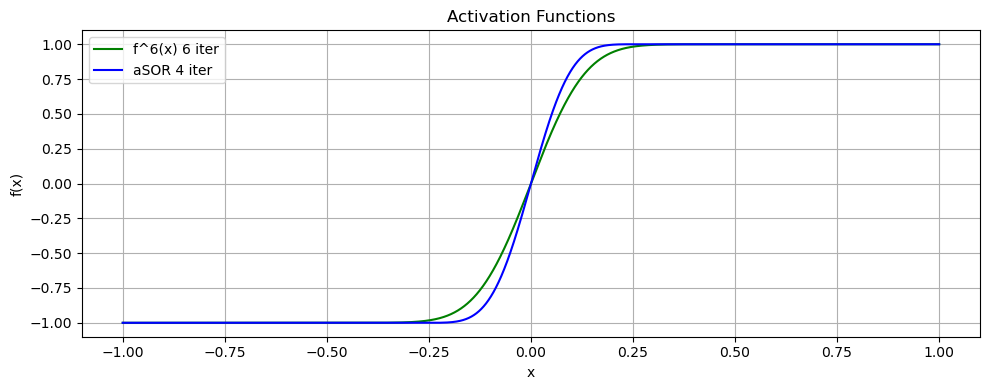

In [3]:
def sign(x, iters):
    for i in range(iters):
        x = f(x)
    return x

def sign_fast(x, K):
    for i in range(len(K)):
        x = f(K[i] * x)
    return x

print(sign(-0.25, 6))

K = [1.51, 1.28, 1.06, 1.01]
print(sign_fast(-0.5, K))


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 4))

# Generate x values
x = np.linspace(-1, 1, 10000)
# Plot activation functions
ax1.plot(x, f(f(f(f(f(x))))), label='f^6(x) 6 iter', color='green')
ax1.plot(x, sign_fast(x, K), label='aSOR 4 iter', color='blue')

ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [4]:
def relaxFactor(f, alpha, sigma_i, upper):
    """
    Calculate the relaxation factors for the adaptive successive over-relaxation (aSOR) method.

    Parameters:
    f (function): The function used in the iterative process.
    alpha (float): The precision parameter, determines the convergence criteria.
    sigma_i (float): The initial input range lower bound, typically a small positive number.

    Returns:
    list: A list of relaxation factors k_i.
    """
    epsilon_i = sigma_i
    K = []  # List to store the relaxation factors

    while 1 - epsilon_i > 2 ** (-alpha):
        # Define a helper function to compute the objective for argmax
        def objective(k):
            return min(f(k * epsilon_i), f(k))

        # Find the optimal k_i that maximizes the objective function
        # Note: This is a simplified approach; in practice, you might need a numerical optimization method
        # Here, we use a simple grid search for demonstration purposes
        from scipy.optimize import minimize_scalar
        # We minimize the negative of the objective function to find the maximum
        res = minimize_scalar(lambda k: -objective(k), bounds=(1, upper), method='bounded')
        k_i = res.x

        # Append the computed k_i to the list K
        K.append(k_i)

        # Update epsilon_i for the next iteration
        epsilon_i = f(k_i)

    return K



# Example usage:
if __name__ == "__main__":
    # Define the function f(z) = -1/2 * z^3 + 3/2 * z
    def f_sign(z):
        return -0.5 * z**3 + 1.5 * z

    alpha = 10  # Precision parameter
    sigma_i = 0  # Initial input range lower bound

    K_sign = relaxFactor(f_sign, alpha, sigma_i, 2)
    print("Relaxation factors:", K_sign)


    def sign(x, iters):
        for i in range(iters):
            x = f_sign(x)
        return x

    def sign_fast(x, K):
        for i in range(len(K)):
            x = f_sign(K[i] * x)
        return x

    input = 0.6

    print(sign(input, 6))

    # K_sign = [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
    print(sign_fast(input, K_sign))

Relaxation factors: [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
0.9999999999999999
0.9999928589826494


In [5]:
def f_inv(z):
    return z * (2 - z)
def inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki * b * (2 - ki*a)
        a = ki * a * (2 - ki*a)
    return b

K_inv = relaxFactor(f_inv, 10, sigma_i, 3)
print(K_inv)

xx = 0.8

# 1 / x
print(inverse(xx, K_inv))
print(1 / xx)

[1.472141915860566, 1.1254419159515154, 1.007928806890655]
1.2499999411718565
1.25


In [6]:
def f_sqrt_inv(z):
    return z*(3 - z)**2 / 4
def sqrt_inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki**0.5 * b * (3 - ki*a) / 2
        a = ki * a * (3 - ki*a)**2 / 4
    return b

K_inv = relaxFactor(f_inv, 10, sigma_i, 3)
print(K_inv)

xx = 40
# 1 / \sqrt(x)
print(sqrt_inverse(xx, K_inv))
print(1/(xx**0.5))

# \sqrt(x)
print(sqrt_inverse(xx, K_inv) * xx)
print(xx**0.5)

[1.472141915860566, 1.1254419159515154, 1.007928806890655]
-1.6306146185081821e+19
0.15811388300841897
-6.522458474032729e+20
6.324555320336759


In [7]:
# x ** -(1/m)
m = 2
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m
def pow_m_inv(x, K):
    y = 1

    for ki in K:
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 10, sigma_i, 2.5)
print(K_inv)

xx = 0.4
# x ** -(1/m)
print(pow_m_inv(xx, K_inv))
print(1/(xx**(1/m)))


[1.3541058464884248, 1.1149359182105651, 1.0103756551364902]
1.581138795470078
1.5811388300841895


In [8]:
acc = 0
for i in range(64):
    acc += i
print(acc)

2016


[ 1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  6.12323400e-17 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00]
y1 [0.12783342518144447, 0.2425253627689112, 0.2071617778091076, 0.15966072205968526, 0.11136534457332409, 0.0705685872300176, 0.04079675734426469, 0.021612689665478996, 0.010538991841324905, 0.004750584526004085, 0.0019879404384196817, 0.0007750592921714148, 0.00028282645169433647, 9.677098094282905e-05, 3.152910274234145e-05, 1.022244621172886e-05]
[2815.718567192069, 5341.976607402512, 4563.041812903657, 3516.761433221797, 2452.9849529711873, 1554.376572809817, 898.6083801824752, 476.051169650444, 232.13674330468857, 104.63858756736687, 43.78730206896451, 17.071816987961835, 6.22966716411338, 2.131522701666221, 0.6944747030961635, 0.22516436182238467]


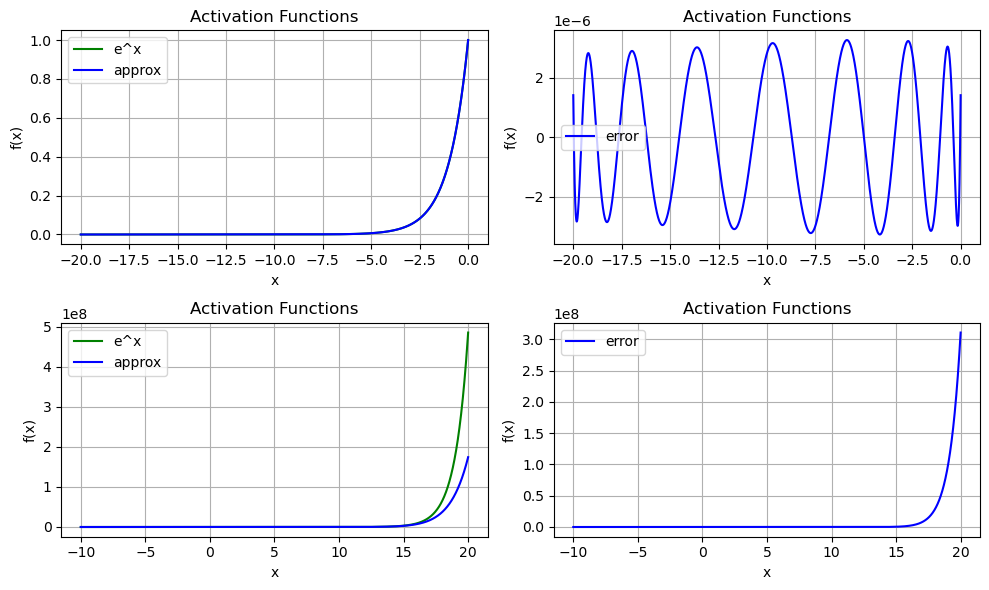

In [9]:
import matplotlib.pyplot  as plt
import math
import numpy as np
from numpy.polynomial import Chebyshev
from random import *

pi = math.pi
cos = math.cos
sin = math.sin 

length = 20

def target_function(x):
    return pow(math.e, x)

def targ_1(x):
    return pow(math.e, (length)/2*(x-1))
    
def targ_2(x):
    return pow(math.e, (length)/2*(x))
    
cheby_deg = 16

# x = np.array([-1 + 2*i/32 for i in range(33)])
x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)

y1 = np.array([targ_1(xx) for xx in x])
chebyPoly = Chebyshev.fit(x, y1, deg = cheby_deg-1)
y1 = chebyPoly.coef
y1 = list(y1)
print("y1", y1)

y2 = np.array([targ_2(xx) for xx in x])
chebyPoly = Chebyshev.fit(x, y2, deg = cheby_deg-1)
y2 = chebyPoly.coef
y2 = list(y2)
print(y2)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn1 = 0
for i in range(0, cheby_deg):
	pn1 = pn1 + y1[i] * T[i]
     
pn2 = 0
for i in range(0, cheby_deg):
	pn2 = pn2 + y2[i] * T[i]

# Generate x values
x = np.linspace(-length, 0, 10000)

# Create the figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Plot activation functions
ax1.plot(x, target_function(x), label='e^x', color='green')
ax1.plot(x, pn1(x*2/length+1), label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, target_function(x) - pn1(x*2/length+1), label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()


x = np.linspace(-length/2, length, 10000)
# Plot activation functions
ax3.plot(x, target_function(x), label='e^x', color='green')
ax3.plot(x, pn2(x*2/length), label='approx', color='blue')
ax3.set_title('Activation Functions')
ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')
ax3.grid(True)
ax3.legend()

# Plot activation functions
ax4.plot(x, target_function(x) - pn2(x*2/length), label='error', color='blue')
ax4.set_title('Activation Functions')
ax4.set_xlabel('x')
ax4.set_ylabel('f(x)')
ax4.grid(True)
ax4.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [10]:
# standard
def softmax1(x):
    e_x = np.exp(x - np.max(x))
    print("max_x: ",np.max(x))
    return e_x / e_x.sum(axis=0)

# optimized
def softmax2(x):
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

# x ** -(1/m)
m = 1
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m

def pow_m_inv(x, K):
    y = 1
    for ki in K:
        # ki*y*(2-x*ki*y)
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 8, sigma_i, 4)
print(K_inv)

# approx
def approx_e1(x):
    return pn1(x/5+1)
def approx_softmax1(x):
    max_x = np.max(x)
    max_x = 5
    e_x = approx_e1(x - max_x)
    temp = e_x.sum(axis=0)
    # print(temp)
    temp = pow_m_inv(temp/20, K_inv) / 20
    return e_x * temp

def approx_e2(x):
    return pn2(x/5)
def approx_softmax2(x):
    e_x = approx_e2(x)
    temp = e_x.sum(axis=0)
    # print(temp)
    temp = pow_m_inv(temp/3000, K_inv) / 3000
    return e_x * temp

data = np.random.uniform(-5, 5, [128])

print("error with optimized softmax", max(softmax1(data) - softmax2(data)))
print("sum of standard softmax", sum(softmax1(data)))

print("error with approx1 softmax", max(softmax1(data) - approx_softmax1(data)))
print("sum of approx1 softmax", sum(approx_softmax1(data)))

print("error with approx2 softmax", max(softmax1(data) - approx_softmax2(data)))
print("sum of approx2 softmax", sum(approx_softmax2(data)))


[1.708209458521407, 1.3347202619383138, 1.0593437148393925]
max_x:  4.9006450985622525
error with optimized softmax 2.7755575615628914e-17
max_x:  4.9006450985622525
sum of standard softmax 1.0
max_x:  4.9006450985622525
error with approx1 softmax 0.009999317426030344
sum of approx1 softmax 0.9971424255325585
max_x:  4.9006450985622525
error with approx2 softmax 828188701256135.5
sum of approx2 softmax -6605956766316610.0


[ 1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  6.12323400e-17 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00]
[0.99330715 0.99263721 0.99023751 0.98459211 0.97168208 0.94146714
 0.87140256 0.72620478 0.5        0.27379522 0.12859744 0.05853286
 0.02831792 0.01540789 0.00976249 0.00736279 0.00669285]
y:  [0.5, 0.5876811235265726, -2.007269726835591e-17, -0.12149623872303088, -2.0072697268355913e-17, 0.035317888765259355, -1.0917210757920756e-16, -0.010693712782924763, -1.8652562430325655e-16, 0.003260293428351401, -2.2019441004172328e-16, -0.0009931752451993756, -9.895698703494615e-18, 0.00029550137814745605, -1.761892554953261e-17, -6.453127146099342e-05]


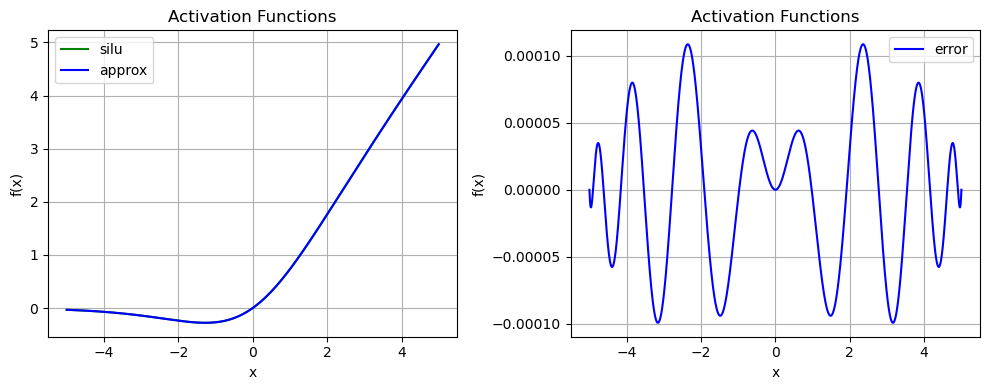

In [11]:
import numpy as np
length = 5
cheby_deg = 16

def target_function(x):
    return pow(math.e, x)/(1 + pow(math.e, x))

def targ_2(x):
    x *= length
    return pow(math.e, x)/(1 + pow(math.e, x))

x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)
y = np.array([targ_2(xx) for xx in x])
print(y)

chebyPoly = Chebyshev.fit(x, y, deg = cheby_deg-1)
y = chebyPoly.coef
y = list(y)
print("y: ", y)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn = 0
for i in range(0, cheby_deg):
	pn = pn + y[i] * T[i]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def swish(x, beta=1):
    return x * sigmoid(beta * x)

def silu(x):
    return swish(x, beta=1)  # SiLU is Swish with beta=1


# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Generate x values
x = np.linspace(-length, length, 10000)
# Plot activation functions
ax1.plot(x, silu(x), label='silu', color='green')
ax1.plot(x, pn(x/length)*x, label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()


# Plot activation functions
ax2.plot(x, silu(x) - pn(x/length)*x, label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

[ 1.00000000e+00  9.87688341e-01  9.51056516e-01  8.91006524e-01
  8.09016994e-01  7.07106781e-01  5.87785252e-01  4.53990500e-01
  3.09016994e-01  1.56434465e-01  6.12323400e-17 -1.56434465e-01
 -3.09016994e-01 -4.53990500e-01 -5.87785252e-01 -7.07106781e-01
 -8.09016994e-01 -8.91006524e-01 -9.51056516e-01 -9.87688341e-01
 -1.00000000e+00]
[9.99999713e-01 9.99999606e-01 9.99999009e-01 9.99995806e-01
 9.99973848e-01 9.99796524e-01 9.98353243e-01 9.88394767e-01
 9.38837144e-01 7.82943347e-01 5.00000000e-01 2.17056653e-01
 6.11628558e-02 1.16052326e-02 1.64675711e-03 2.03476009e-04
 2.61520748e-05 4.19402199e-06 9.90845147e-07 3.93746561e-07
 2.86651572e-07]
[0.4999999999999999, 0.6234577655281024, 2.1938197590748047e-17, -0.17602455084661336, 3.8397062060234874e-17, 0.07617494799506995, 2.5058771037119205e-16, -0.03371905009934949, 1.9442573437879256e-16, 0.014114717269537384, 6.136919126806236e-16, -0.005457385541723384, 5.961195387018996e-16, 0.0019361656181797757, 2.3980071897640697e

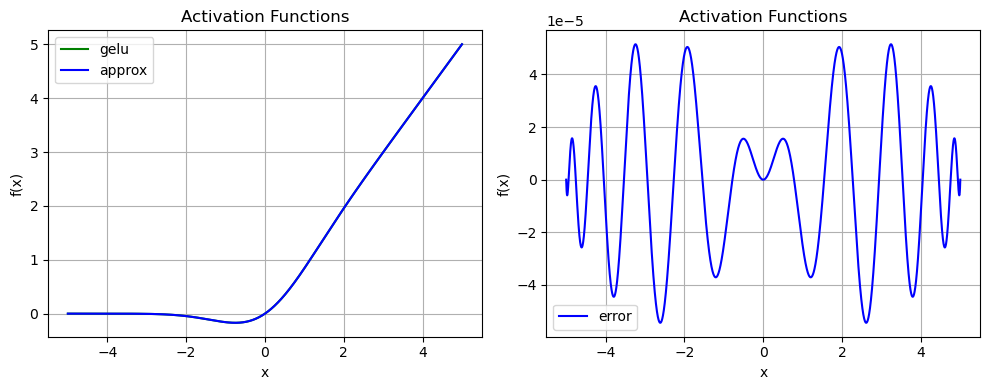

In [12]:
from scipy.stats import norm

length = 5

def relu(x):
    return np.maximum(0, x)

def gelu(x):
    return x * norm.cdf(x)

def targ_2(x):
    x *= length
    return norm.cdf(x)
    
cheby_deg = 20

x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)
y = np.array([targ_2(xx) for xx in x])
print(y)

chebyPoly = Chebyshev.fit(x, y, deg = cheby_deg-1)
y = chebyPoly.coef
y = list(y)
print(y)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn = 0
for i in range(0, cheby_deg):
	pn = pn + y[i] * T[i]
     
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Generate x values
x = np.linspace(-length, length, 10000)
# Plot activation functions
ax1.plot(x, gelu(x), label='gelu', color='green')
ax1.plot(x, pn(x/length)*x, label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, gelu(x) - pn(x/length)*x, label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()